In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline

In [4]:
train = pd.read_csv("./input/Train/train.csv")
test = pd.read_csv("./input/Test/test.csv")

print("shape of train: ", train.shape, "shape of test: ", test.shape)

shape of train:  (7767, 563) shape of test:  (3162, 563)


In [ ]:
print(train.isnull().values.any())
print(test.isnull().values.any())

Observation: Train data and test data is divided in approximately 70:30. There are no missing values.

### Visualizations for Train data

In [ ]:
print(train.Activity.value_counts())

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x=train.Activity)
plt.xlabel('Activity')
plt.ylabel('count')
plt.title('Frequency of Activities in Train Set')
plt.show()

In [ ]:
# Stacked Bar Chart for different activities with regards to subjects

stack_group = train.groupby(['subject', 'Activity']).size().unstack()
stack_group.plot(kind='bar', stacked=True, figsize=(17, 8), title = 'Activity count w.r.t Subjects in train')
plt.show()

### Visualizations for Test data

In [ ]:
print(test.Activity.value_counts())

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x=test.Activity)
plt.xlabel('Activity')
plt.ylabel('count')
plt.title('Frequency of Activities in test')
plt.show()

In [ ]:
# Stacked Bar Chart for different activities with regards to subjects

stack_group = test.groupby(['subject', 'Activity']).size().unstack()
stack_group.plot(kind='bar', stacked=True, figsize=(17, 8), title = 'Activity count w.r.t Subjects in test')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
# First, we need to standardize the data to get better performance
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

train_features, validation_features, train_labels, validation_labels = train_test_split(x, y, test_size=0.25, random_state=1300)

targets = train['Activity'].unique()

train_labels = pd.DataFrame(train_labels, columns=['Activity'])
validation_labels = pd.DataFrame(validation_labels, columns=['Activity'])

### Principal Component Analysis (PCA)
We want to use PCA to reduce the the multidimension features in our data into fewer dimensions to better understand the data distribution. We are interested to find out whether the classes are separable using these selected principal components.

#### 2 Components PCA

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(train_features)
principalDf = pd.DataFrame(data = X_train
             , columns = ['PC1', 'PC2'])

In [ ]:
finalDf = pd.concat([principalDf, train_labels], axis = 1)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA with 2 components', fontsize = 20)

for target in targets:
    indicesToKeep = finalDf['Activity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

From the result above we can see that the first principal component contains 48.08% of the variance and the second principal component contains 8.11% of the variance. Together, the two components contain 56.19% of the information, which is not very representative. The classes are also overlapping.

#### 3 Components PCA

In [ ]:
pca3 = PCA(n_components=3)
PC3 = pca3.fit_transform(x)
principalDf3 = pd.DataFrame(data = PC3
             , columns = ['PC1', 'PC2', 'PC3'])

In [ ]:
finalDf3 = pd.concat([principalDf3, train[['Activity']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('PCA with 3 components', fontsize = 20)
targets = train['Activity'].unique()

for target in targets:
    indicesToKeep = finalDf3['Activity'] == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'PC1']
               , finalDf3.loc[indicesToKeep, 'PC2']
               , finalDf3.loc[indicesToKeep, 'PC3']
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
PC3.shape

In [ ]:
pca3.explained_variance_ratio_

From the variance ratio above we can see that the first principal component contains 48.15% of the variance and the second principal component contains 8.08% of the variance, and the third principal component contains 3.19% of the variance. Together, the three components contain 59.42% of the information, which is still considerably small. The classes are again overlapping.

In [ ]:
pca_n = PCA(n_components=120)
PCN = pca_n.fit_transform(x)

In [ ]:
PCN.shape

In [ ]:
np.sum(pca_n.explained_variance_ratio_)

### Isomap Embedding

In [ ]:
# First, we need to standardize the data to get better performance
from sklearn.preprocessing import StandardScaler
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.manifold import Isomap as ISO

iso = ISO(n_components = 2)
isomap = iso.fit_transform(x)
isomapTempDf = pd.DataFrame(data = isomap, columns = ["ISO1", "ISO2"])

In [ ]:
isomapFinalDf = pd.concat([isomapTempDf, train[['Activity']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('ISO1', fontsize = 15)
ax.set_ylabel('ISO2', fontsize = 15)
ax.set_title('Isomap Embedding', fontsize = 20)
targets = train['Activity'].unique()

for target in targets:
    indicesToKeep = isomapFinalDf['Activity'] == target
    ax.scatter(isomapFinalDf.loc[indicesToKeep, 'ISO1']
               , isomapFinalDf.loc[indicesToKeep, 'ISO2']
               , s = 30
               , alpha = 0.5)
ax.legend(targets)
ax.grid()

In [ ]:
isomap.shape

### t-Distributed Stochastic Neighbour Embedding (t-SNE)

In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 50, n_iter = 2500)
tsne_results = tsne.fit_transform(train_features)

df_subset = pd.DataFrame(columns = ['tsne-2d-one','tsne-2d-two', 'Activities'])
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]
df_subset['Activities'] = train_labels

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize = (16, 10))
plt.title('t-SNE with 2 Components')

sns.scatterplot(
    x = "tsne-2d-one", y = "tsne-2d-two",
    hue = "Activities",
    palette = "bright",
    data = df_subset,
    legend = "full",
    alpha = 0.3
)

plt.show()

In [ ]:
tsne_results.shape

In [ ]:
pca = PCA(n_components=120, random_state = 1300)  
X_train = pca.fit_transform(train_features)  
X_val = pca.transform(validation_features) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, train_labels)

In [ ]:
dt.score(X_val, validation_labels)

In [ ]:
dt.score(X_train, train_labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Based on number of trees
clf_RF_n = [RandomForestClassifier(n_estimators = 50, random_state  = 1300),
            RandomForestClassifier(n_estimators = 150, random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, random_state  = 1300),
            RandomForestClassifier(n_estimators = 400, random_state  = 1300),
            RandomForestClassifier(n_estimators = 500, random_state  = 1300)]

In [ ]:
from sklearn.metrics import accuracy_score
from timeit import default_timer as timer

acc_RF_n = []
ex_time_RF_n = []

for clf in clf_RF_n:
    start_time = timer()
    fit = clf.fit(X_train, np.ravel(train_labels))
    pred = fit.predict(X_val)
    accuracy = accuracy_score(validation_labels, pred)
    elapsed = timer() - start_time
    
    ex_time_RF_n.append(elapsed)
    acc_RF_n.append(accuracy)

In [ ]:
acc_RF_n

In [ ]:
# Graphical Representation of ACCURACY and EXECUTION Time for RANDOM FOREST CLASSIFIER

label = ('n=50','n=150','n=200','n=400','n=500')
Accu = acc_RF_n
ExTime = ex_time_RF_n

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

In [ ]:
clf_RF_d = [RandomForestClassifier(n_estimators = 200, max_depth = 10, random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, max_depth = 20, random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, max_depth = 40, random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, max_depth = 50,random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, max_depth = 70, random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, max_depth = 200, random_state  = 1300)]

In [ ]:
ex_time_RF_d = []
acc_RF_d = []

for clf in clf_RF_d :
    start_time = timer()
    fit = clf.fit(X_train, np.ravel(train_labels))
    pred = fit.predict(X_test)
    accuracy = accuracy_score(validation_labels, pred)
    elapsed = timer() - start_time
    
    ex_time_RF_d.append(elapsed)
    acc_RF_d.append(accuracy)

In [ ]:
# Graphical Representation of ACCURACY and Execution Time for Random Forest with n = 200 and different max depths of a tree.

label = ('d =10','d =20','d =40','d =50','d =70', ' d =200')
Accu = acc_RF_d
ExTime = ex_time_RF_d


plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

# Comparing performance for different methods of dimensionality reduction

In [67]:
# Measure the accuracy using Random Forest Classifier, number of tree = 140, maximum depth = 40, random seed = 1300
# data is transformed with PCA

from sklearn.ensemble import RandomForestClassifier as RFC
label = ["Activity"]
features = list(train.columns)[:-1]

# varying number of features for PCA

def n_PCA(n):
    pca = PCA(n_components = n, random_state = 1300)
    X_train = pca.fit_transform(train_features)
    X_validation = pca.transform(validation_features)
    return X_train, X_validation #return the transformed data both train and validation

accuracy = []

for i in range(2, 10):
    X_train, X_validation = n_PCA(i)
    y_train, y_validation = train_labels.values.ravel(), validation_labels.values.ravel()
    rfc = RFC(n_estimators = 140, max_depth = 40, random_state = 1300)
    model = rfc.fit(X_train, y_train)
    rfc_accuracy = model.score(X_validation, y_validation)
    accuracy.append([i, rfc_accuracy])
    
for i in range(10, 200, 10):
    X_train, X_validation = n_PCA(i)
    y_train, y_validation = train_labels.values.ravel(), validation_labels.values.ravel()
    rfc = RFC(n_estimators = 140, max_depth = 40, random_state = 1300)
    model = rfc.fit(X_train, y_train)
    rfc_accuracy = model.score(X_validation, y_validation)
    accuracy.append([i, rfc_accuracy])


    

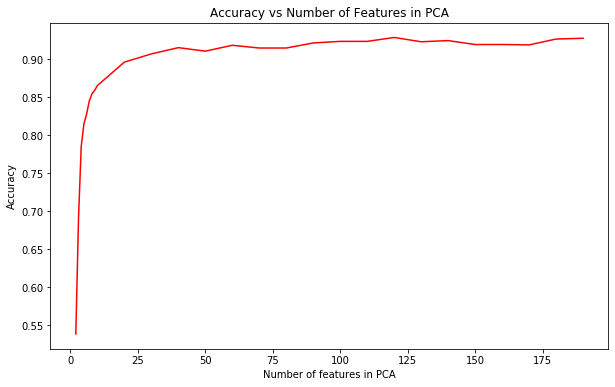

In [74]:
# Plotting the accuracy vs number of PCA features
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(list(map(lambda x: x[0], accuracy)), list(map(lambda x: x[1], accuracy)), color = "r")
plt.xlabel("Number of features in PCA")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Features in PCA")
plt.show()

In [80]:
# highest accuracy with PCA

max_accuracy_PCA = max(accuracy, key = lambda x:x[1])
print("maximum accuracy attained at n = ", max_accuracy_PCA[0], "\nwith the accuracy of = ", max_accuracy_PCA[1])

maximum accuracy attained at n =  120 
with the accuracy of =  0.9289392378990731


In [88]:
# data is transform using t-SNE
from sklearn.manifold import TSNE

def n_TSNE(n, perplexity):
    tsne = TSNE(n_components = n, perplexity = perplexity, n_iter = 2500, random_state = 1300)
    train_validation_combined = np.append(train_features, validation_features, axis = 0)
    X_combined = tsne.fit_transform(train_validation_combined)
    X_train, X_validation = X_combined[:len(train_features)], X_combined[len(train_features):] 
    return X_train, X_validation #return the transformed data both train and validation

# Model accuracy with Random Forest Classifier

X_train, X_validation = n_TSNE(2, 50)
y_train, y_validation = train_labels.values.ravel(), validation_labels.values.ravel()
rfc = RFC(n_estimators = 140, max_depth = 40, random_state = 1300)
model = rfc.fit(X_train, y_train)
rfc_accuracy = model.score(X_validation, y_validation)
print(rfc_accuracy)

0.9402677651905252


In [ ]:
# data is transformed using ISOMAP embedding
from sklearn.manifold import Isomap

def n_isomap(n, neighbors):
    iso = Isomap(n_components = n, n_neighbors = neighbors)
    X_train = iso.fit_transform(train_features)
    X_validation = iso.transform(validation_features)
    return X_train, X_validation

accuracy_isomap = []
for i in range(2, 10):
    X_train, X_validation = n_isomap(i, 5)
    y_train, y_validation = train_labels.values.ravel(), validation_labels.values.ravel()
    rfc = RFC(n_estimators = 140, max_depth = 40, random_state = 1300)
    model = rfc.fit(X_train, y_train)
    rfc_accuracy = model.score(X_validation, y_validation)
    print(rfc_accuracy)
    accuracy_isomap.append(rfc_accuracy)

for i in range(10, 200, 10):
    X_train, X_validation = n_isomap(i, 5)
    y_train, y_validation = train_labels.values.ravel(), validation_labels.values.ravel()
    rfc = RFC(n_estimators = 140, max_depth = 40, random_state = 1300)
    model = rfc.fit(X_train, y_train)
    rfc_accuracy = model.score(X_validation, y_validation)
    print(rfc_accuracy)
    accuracy_isomap.append(rfc_accuracy)


0.7198764160659115
0.8377960865087538
0.8486096807415036
0.8558187435633368
0.8671472708547889
0.8717816683831102
0.8717816683831102
0.8748712667353244
0.880020597322348
0.8815653964984552


# Evaluation

Evaluating the current model (Random Forest) based on F1 Score, run time Recall and Precision

**Will add the rest once andrea adds the smote function

In [1]:
#Import package used

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from timeit import default_timer as timer
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [10]:
#Preparing the data for training

#Separating features and response for training data
xtrain_features = train.iloc[:,:-1]
xtrain_label = train['Activity']

#Separating features and response for test data
test_features = train.iloc[:,:-1]
test_label = train['Activity']

In [11]:
#List of labels
activity_label = pd.Series(test.Activity.values).unique()

activity_label_fixed = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

activity_label_moving = ['STAND_TO_SIT', 'SIT_TO_STAND',
       'STAND_TO_LIE', 'LIE_TO_SIT', 'SIT_TO_LIE',
       'LIE_TO_STAND']

In [12]:
#Convert everything to numpy array to fit into the model
X_labels = np.array(xtrain_label)
X_features = np.array(xtrain_features)

test_labels = np.array(test_label)
test_features = np.array(test_features) 

In [13]:
#Splitting train data into validation and train, at using 20-80 ratio, with random state = 1300

train_features, val_features, train_labels, val_labels = train_test_split(X_features, X_labels, test_size=0.2, random_state=1300)

In [14]:
print("train_features:", train_features.shape, "train_labels: ", train_labels.shape , "val_features: ", val_features.shape, "val_labels:" , val_labels.shape)

train_features: (6213, 562) train_labels:  (6213,) val_features:  (1554, 562) val_labels: (1554,)


In [26]:
# Do Dimentionality Reduction, Principal Component Analysis, with n_components = 120 (As found above), with random state = 1300
# Do it after splitting to prevent snooping

pca = PCA(n_components=120, random_state = 1300)  
X_train = pca.fit_transform(train_features)  
X_val = pca.transform(val_features)  
X_test = pca.transform(test_features)

In [16]:
# Running RandomForest with depth = 40, random state = 1300 for validation set
clf = RandomForestClassifier(n_estimators = 150, max_depth = 40, max_features= 'log2', random_state = 1300)

start_time = timer()
fit = clf.fit(train_features, train_labels)
pred_val = fit.predict(val_features)


#Get evaluation metric
accuracy_val = accuracy_score(val_labels, pred_val)
elapsed_val = timer() - start_time
f1_val = f1_score(val_labels, pred_val, average = None, labels = activity_label)
avgf1_val = f1_score(val_labels, pred_val, average = "micro") #Using micro as labels are under represented
recall_val = recall_score(val_labels, pred_val, average = None, labels = activity_label)
avgrecall_val = recall_score(val_labels, pred_val, average = "micro") #Using micro as labels are under represented
precision_val = precision_score(val_labels, pred_val, average = None, labels = activity_label)
avgprec_val = precision_score(val_labels, pred_val, average = "micro") #Using micro as labels are under represented

In [17]:
print("Accuracy of Validation Set: ", accuracy_val)
print("Average Precision Score of Validation Set: ", avgprec_val)
print("Average Recall Score of Validation Set: ", avgrecall_val)
print("Average F1 Score of Validation Set: ", avgf1_val)
print("Run Time of Validation Set:", elapsed_val)

Accuracy of Validation Set:  0.9716859716859717
Average Precision Score of Validation Set:  0.9716859716859717
Average Recall Score of Validation Set:  0.9716859716859717
Average F1 Score of Validation Set:  0.9716859716859717
Run Time of Validation Set: 5.750156599999997


In [18]:
pd.DataFrame([f1_val] + [recall_val] + [precision_val], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

,STANDING,STAND_TO_SIT,SITTING,SIT_TO_STAND,STAND_TO_LIE,LAYING,LIE_TO_SIT,SIT_TO_LIE,LIE_TO_STAND,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
F1 Score,0.967851,0.444444,0.963504,0.666667,0.756757,1.0,0.740741,0.709677,0.421053,1.0,0.994652,0.987835
Recall Score,0.976109,0.333333,0.956522,0.500000,0.823529,1.0,0.909091,0.733333,0.285714,1.0,1.000000,0.990244
Precision Score,0.959732,0.666667,0.970588,1.000000,0.700000,1.0,0.625000,0.687500,0.800000,1.0,0.989362,0.985437


For the Validation set, it seems like the scores for the average and accuracy seem to be acceptable (Around 97%)

But when we look at the individual F1/Precision/Recall score, it seems that the transitional labels all generally have signficantly lower score compared to the stationary action labels

In [19]:
# Running RandomForest with depth = 40, random state = 1300 for test set

start_time = timer()
fit_test = clf.fit(train_features, train_labels)
pred_test = fit_test.predict(test_features)

#Get etestuation metric
accuracy_test = accuracy_score(test_labels, pred_test)
elapsed_test = timer() - start_time
f1_test = f1_score(test_labels, pred_test, average = None, labels = activity_label)
avgf1_test = f1_score(test_labels, pred_test, average = "macro") #Using micro as labels are under represented
recall_test = recall_score(test_labels, pred_test, average = None, labels = activity_label)
avgrecall_test = recall_score(test_labels, pred_test, average = "micro") #Using micro as labels are under represented
precision_test = precision_score(test_labels, pred_test, average = None, labels = activity_label)
avgprec_test = precision_score(test_labels, pred_test, average = "micro") #Using micro as labels are under represented

In [20]:
print("Accuracy of Test Set: ", accuracy_test)
print("Average Precision Score of Test Set: ", avgprec_test)
print("Average Recall Score of Test Set: ", avgrecall_test)
print("Average F1 Score of Test Set: ", avgf1_test)
print("Run Time of Test Set:", elapsed_test)

Accuracy of Test Set:  0.9943350070812411
Average Precision Score of Test Set:  0.9943350070812411
Average Recall Score of Test Set:  0.9943350070812411
Average F1 Score of Test Set:  0.969628050235721
Run Time of Test Set: 5.660717499999997


In [21]:
pd.DataFrame([f1_test] + [recall_test] + [precision_test], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

,STANDING,STAND_TO_SIT,SITTING,SIT_TO_STAND,STAND_TO_LIE,LAYING,LIE_TO_SIT,SIT_TO_LIE,LIE_TO_STAND,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
F1 Score,0.993336,0.945055,0.992254,0.977778,0.950820,1.0,0.944000,0.940397,0.895238,1.0,0.998988,0.997671
Recall Score,0.995081,0.914894,0.990719,0.956522,0.966667,1.0,0.983333,0.946667,0.824561,1.0,1.000000,0.998136
Precision Score,0.991597,0.977273,0.993794,1.000000,0.935484,1.0,0.907692,0.934211,0.979167,1.0,0.997978,0.997207


Now to check using the PCA data instead to see if there are any improvement.

In [50]:
# Running RandomForest with depth = 40, random state = 1300 for PCA validation set
clf = RandomForestClassifier(n_estimators = 150, max_depth = 40, max_features= 'log2', random_state = 1300)

start_time = timer()
fit = clf.fit(X_train, train_labels)
pred_val2 = fit.predict(X_val)


#Get evaluation metric
accuracy_val2 = accuracy_score(val_labels, pred_val2)
elapsed_val2 = timer() - start_time
f1_val2 = f1_score(val_labels, pred_val2, average = None, labels = activity_label)
avgf1_val2 = f1_score(val_labels, pred_val2, average = "micro") #Using micro as labels are under represented
recall_val2 = recall_score(val_labels, pred_val2, average = None, labels = activity_label)
avgrecall_val2 = recall_score(val_labels, pred_val2, average = "micro") #Using micro as labels are under represented
precision_val2 = precision_score(val_labels, pred_val2, average = None, labels = activity_label, zero_division = 0)
avgprec_val2 = precision_score(val_labels, pred_val2, average = "micro") #Using micro as labels are under represented

Here, a warning appeared as the label "SIT_TO_STAND" was predicted 0 times. Hence TP + FP = 0, causing precision to give an warning. So it was set to 0 by default

In [52]:
print("Label that had 0 predictions: ", set(val_labels) - set(pred_val2))

Label that had 0 predictions:  {'SIT_TO_STAND'}


In [53]:
print("Accuracy of Validation Set: ", accuracy_val2)
print("Average Precision Score of Validation Set: ", avgprec_val2)
print("Average Recall Score of Validation Set: ", avgrecall_val2)
print("Average F1 Score of Validation Set: ", avgf1_val2)
print("Run Time of Validation Set:", elapsed_val2)

Accuracy of Validation Set:  0.9247104247104247
Average Precision Score of Validation Set:  0.9247104247104247
Average Recall Score of Validation Set:  0.9247104247104247
Average F1 Score of Validation Set:  0.9247104247104247
Run Time of Validation Set: 4.78855139999996


In [54]:
pd.DataFrame([f1_val2] + [recall_val2] + [precision_val2], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

,STANDING,STAND_TO_SIT,SITTING,SIT_TO_STAND,STAND_TO_LIE,LAYING,LIE_TO_SIT,SIT_TO_LIE,LIE_TO_STAND,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
F1 Score,0.900813,0.500000,0.872865,0.0,0.645161,0.989796,0.500000,0.583333,0.400000,0.985386,0.949333,0.944578
Recall Score,0.945392,0.333333,0.833333,0.0,0.588235,1.000000,0.545455,0.466667,0.285714,0.991597,0.956989,0.956098
Precision Score,0.860248,1.000000,0.916335,0.0,0.714286,0.979798,0.461538,0.777778,0.666667,0.979253,0.941799,0.933333


In [55]:
# Running RandomForest with depth = 40, random state = 1300 for test set

start_time = timer()
fit_test2 = clf.fit(X_train, train_labels)
pred_test2 = fit_test2.predict(X_test)

#Get etest2uation metric
accuracy_test2 = accuracy_score(test_labels, pred_test2)
elapsed_test2 = timer() - start_time
f1_test2 = f1_score(test_labels, pred_test2, average = None, labels = activity_label)
avgf1_test2 = f1_score(test_labels, pred_test2, average = "macro") #Using micro as labels are under represented
recall_test2 = recall_score(test_labels, pred_test2, average = None, labels = activity_label)
avgrecall_test2 = recall_score(test_labels, pred_test2, average = "micro") #Using micro as labels are under represented
precision_test2 = precision_score(test_labels, pred_test2, average = None, labels = activity_label)
avgprec_test2 = precision_score(test_labels, pred_test2, average = "micro") #Using micro as labels are under represented

In [57]:
print("Accuracy of Test Set: ", accuracy_test2)
print("Average Precision Score of Test Set: ", avgprec_test2)
print("Average Recall Score of Test Set: ", avgrecall_test2)
print("Average F1 Score of Test Set: ", avgf1_test2)
print("Run Time of Test Set:", elapsed_test2)

Accuracy of Test Set:  0.984936268829664
Average Precision Score of Test Set:  0.984936268829664
Average Recall Score of Test Set:  0.984936268829664
Average F1 Score of Test Set:  0.9578574361023887
Run Time of Test Set: 5.188065999999935


In [58]:
pd.DataFrame([f1_test2] + [recall_test2] + [precision_test2], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

,STANDING,STAND_TO_SIT,SITTING,SIT_TO_STAND,STAND_TO_LIE,LAYING,LIE_TO_SIT,SIT_TO_LIE,LIE_TO_STAND,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
F1 Score,0.978783,0.955556,0.973838,0.954545,0.937853,0.997881,0.901639,0.930556,0.886792,0.997149,0.990389,0.989307
Recall Score,0.988756,0.914894,0.964424,0.913043,0.922222,1.000000,0.916667,0.893333,0.824561,0.998369,0.991895,0.991612
Precision Score,0.969008,1.000000,0.983438,1.000000,0.954023,0.995772,0.887097,0.971014,0.959184,0.995932,0.988889,0.987013


Comparison between the 4 results

In [66]:
#Overall

val_res = [accuracy_val, avgprec_val, avgrecall_val, avgf1_val, elapsed_val]
pca_val_res = [accuracy_val2, avgprec_val2, avgrecall_val2, avgf1_val2, elapsed_val2]
test_res = [accuracy_test, avgprec_test, avgrecall_test, avgf1_test, elapsed_test]
pca_test_res = [accuracy_test2, avgprec_test2, avgrecall_test2, avgf1_test2, elapsed_test2]

pd.DataFrame([val_res] + [pca_val_res] + [test_res] + [pca_test_res], columns = ["Accuracy", "Avg Precision", "Avg Recall", "Avg F1", "Run Time"], index = ["Validation", "PCA Validation", "Test", "PCA Test"])

,Accuracy,Avg Precision,Avg Recall,Avg F1,Run Time
Validation,0.971686,0.971686,0.971686,0.971686,5.750157
PCA Validation,0.924710,0.924710,0.924710,0.924710,4.788551
Test,0.994335,0.994335,0.994335,0.969628,5.660717
PCA Test,0.984936,0.984936,0.984936,0.957857,5.188066


From the above, it seems that the overall accuracy / recall / precision / F1 all seem to be better when PCA is not applied to the data, but we will need to compare each individual score to get a better sensing of how the under-represented data are faring. The runtime, however, seem to be better when using the PCA data. 

In [67]:
pd.DataFrame([f1_test2] + [recall_test2] + [precision_test2], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])
pd.DataFrame([f1_val2] + [recall_val2] + [precision_val2], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

,STANDING,STAND_TO_SIT,SITTING,SIT_TO_STAND,STAND_TO_LIE,LAYING,LIE_TO_SIT,SIT_TO_LIE,LIE_TO_STAND,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
F1 Score,0.900813,0.500000,0.872865,0.0,0.645161,0.989796,0.500000,0.583333,0.400000,0.985386,0.949333,0.944578
Recall Score,0.945392,0.333333,0.833333,0.0,0.588235,1.000000,0.545455,0.466667,0.285714,0.991597,0.956989,0.956098
Precision Score,0.860248,1.000000,0.916335,0.0,0.714286,0.979798,0.461538,0.777778,0.666667,0.979253,0.941799,0.933333


In [68]:
pd.DataFrame([f1_val] +[f1_val2] + [recall_val] + [recall_val2] + [precision_val] + [precision_val2], columns = activity_label, index = ["F1 Score", "PCA F1 Score", "Recall Score", "PCA Recall Score", "Precision Score", "PCA Precision Score"])

,STANDING,STAND_TO_SIT,SITTING,SIT_TO_STAND,STAND_TO_LIE,LAYING,LIE_TO_SIT,SIT_TO_LIE,LIE_TO_STAND,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
F1 Score,0.967851,0.444444,0.963504,0.666667,0.756757,1.000000,0.740741,0.709677,0.421053,1.000000,0.994652,0.987835
PCA F1 Score,0.900813,0.500000,0.872865,0.000000,0.645161,0.989796,0.500000,0.583333,0.400000,0.985386,0.949333,0.944578
Recall Score,0.976109,0.333333,0.956522,0.500000,0.823529,1.000000,0.909091,0.733333,0.285714,1.000000,1.000000,0.990244
PCA Recall Score,0.945392,0.333333,0.833333,0.000000,0.588235,1.000000,0.545455,0.466667,0.285714,0.991597,0.956989,0.956098
Precision Score,0.959732,0.666667,0.970588,1.000000,0.700000,1.000000,0.625000,0.687500,0.800000,1.000000,0.989362,0.985437
PCA Precision Score,0.860248,1.000000,0.916335,0.000000,0.714286,0.979798,0.461538,0.777778,0.666667,0.979253,0.941799,0.933333


For the validation set, it appears that generally for most of the scores, the PCA data seem to have a small drop, but some of the less represented data (e.g Stand to Sit) have rise in their precision scores.

In [69]:
pd.DataFrame([f1_test] +[f1_test2] + [recall_test] + [recall_test2] + [precision_test] + [precision_test2], columns = activity_label, index = ["F1 Score", "PCA F1 Score", "Recall Score", "PCA Recall Score", "Precision Score", "PCA Precision Score"])

,STANDING,STAND_TO_SIT,SITTING,SIT_TO_STAND,STAND_TO_LIE,LAYING,LIE_TO_SIT,SIT_TO_LIE,LIE_TO_STAND,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
F1 Score,0.993336,0.945055,0.992254,0.977778,0.950820,1.000000,0.944000,0.940397,0.895238,1.000000,0.998988,0.997671
PCA F1 Score,0.978783,0.955556,0.973838,0.954545,0.937853,0.997881,0.901639,0.930556,0.886792,0.997149,0.990389,0.989307
Recall Score,0.995081,0.914894,0.990719,0.956522,0.966667,1.000000,0.983333,0.946667,0.824561,1.000000,1.000000,0.998136
PCA Recall Score,0.988756,0.914894,0.964424,0.913043,0.922222,1.000000,0.916667,0.893333,0.824561,0.998369,0.991895,0.991612
Precision Score,0.991597,0.977273,0.993794,1.000000,0.935484,1.000000,0.907692,0.934211,0.979167,1.000000,0.997978,0.997207
PCA Precision Score,0.969008,1.000000,0.983438,1.000000,0.954023,0.995772,0.887097,0.971014,0.959184,0.995932,0.988889,0.987013


For the test set similarly to the validation set, it appears that generally for most of the scores, the PCA data seem to have a drop, but some of the less represented data (e.g Stand to Sit) have rise in their precision scores.

